This notebook explores Chicago Crime public dataset (bigquery-public-data.chicago_crime.crime)

In [3]:
query = """
SELECT count(arrest) FROM `bigquery-public-data.chicago_crime.crime` where arrest IS true 
"""

In [4]:
# Call BigQuery and examine in dataframe
import google.datalab.bigquery as bq
df = bq.Query(query + " LIMIT 100").execute().result().to_dataframe()


In [10]:
print("There were " + str(df.at[0,"f0_"]) + " arrests in Chicago")

There were 1874936 arrests in Chicago


Chicago coordinates are: latitude 41.8781° N, longitude 87.6298° W

In [ ]:
#example row


I create a table with ~ 1/5 of data :
SELECT * FROM `bigquery-public-data.chicago_crime.crime` 
where MOD(unique_key, 5) = 0


In [35]:
############################## THIS
query = """
SELECT * FROM `ml-sme-223918.bqml_tutorial_us.chicago_crime_subset` 
"""

In [36]:
############################## THIS
import google.datalab.bigquery as bq
df = bq.Query(query + " LIMIT 10000").execute().result().to_dataframe()

In [4]:
df.describe()

,unique_key,beat,district,ward,community_area,x_coordinate,y_coordinate,year,latitude,longitude
count,1.000000e+04,10000.000000,10000.000000,9094.000000,9093.000000,9.880000e+03,9.880000e+03,10000.000000,9880.000000,9880.000000
mean,6.019879e+06,957.668400,8.809300,25.222784,37.324645,1.169884e+06,1.862125e+06,2007.964600,41.777162,-87.652792
std,2.959119e+06,624.775001,5.129304,12.797437,17.621808,1.009025e+04,3.898737e+04,4.846122,0.107122,0.036301
min,6.400000e+02,512.000000,5.000000,2.000000,3.000000,1.145015e+06,1.818775e+06,2001.000000,41.658132,-87.743523
25%,3.354052e+06,522.000000,5.000000,9.000000,30.000000,1.162321e+06,1.828462e+06,2004.000000,41.684619,-87.679737
50%,5.864905e+06,531.000000,5.000000,25.000000,49.000000,1.173140e+06,1.835508e+06,2007.000000,41.703900,-87.641880
75%,8.407878e+06,1033.000000,10.000000,34.000000,53.000000,1.178061e+06,1.888487e+06,2011.000000,41.849705,-87.623786
max,1.152740e+07,2323.000000,19.000000,48.000000,56.000000,1.188194e+06,1.932093e+06,2018.000000,41.969159,-87.586439


I observe that latitude is between (41.658132, 41.969159)
and longitude is between (-87.743523, -87.586439)

Also I see that year is between 2001 and 2018

In [6]:
df.head()

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,3045,HL177967,2005-02-12 20:47:00,007XX E 103RD ST,0110,HOMICIDE,FIRST DEGREE MURDER,RETAIL STORE,True,False,...,9.0,50.0,01A,1182951.0,1836828.0,2005,2015-08-17 15:03:40,41.707456,-87.605637,"(41.707455731, -87.605637491)"
1,3205,HL435664,2005-06-21 21:28:00,103XX S INDIANA AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,9.0,49.0,01A,1179414.0,1836239.0,2005,2015-08-17 15:03:40,41.705921,-87.618608,"(41.705920727, -87.618607847)"
2,20900,HW295447,2013-05-29 15:11:00,000XX W 107TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,34.0,49.0,01A,1177693.0,1834013.0,2013,2015-08-17 15:03:40,41.699851,-87.624977,"(41.699851294, -87.624977038)"
3,1710710,G513455,2001-08-27 23:55:00,104XX S STATE ST,0265,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,RESIDENCE,False,False,...,NaN,NaN,02,1178136.0,1835744.0,2001,2015-08-17 15:03:40,41.704591,-87.623303,"(41.70459139, -87.623302709)"
4,11363170,JB327133,2018-06-29 00:44:13,002XX W 104TH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,34.0,49.0,02,1176571.0,1835979.0,2018,2018-07-06 15:55:18,41.705272,-87.629026,"(41.705271529, -87.629026445)"


I see in BigQuery:
Table size 271.74 MB

Number of rows 1,353,959

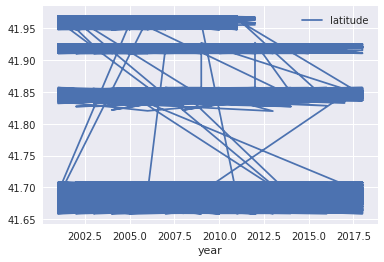

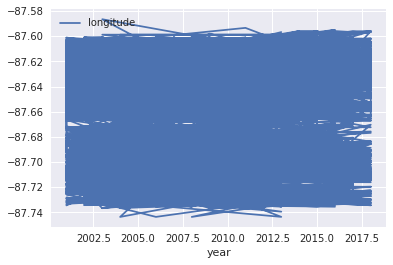

In [6]:
df.plot(x='year', y='latitude')
df.plot(x='year', y='longitude')

I see a lot of crime activity happening between 41.66 : 41.71 latitude in Chicago.

In [12]:
print(df['location'][0])

(41.707455731, -87.605637491)


In [ ]:
print(df['location'])

In [14]:
for x in df['location'][0]:
  print(x)

(
4
1
.
7
0
7
4
5
5
7
3
1
,
 
-
8
7
.
6
0
5
6
3
7
4
9
1
)


In [15]:
print(df['location'][0].find(","))

13


so it's a string

In [37]:
############################## THIS
import copy
df2=copy.deepcopy(df)

https://docs.python.org/2/library/copy.html

Now, considering first element is (41.707455731, -87.605637491)

In [8]:
print(df2['location'][0][8:13])

55731


In [21]:
print(len(df2['location'][0]))

29


In [24]:
print(df2['location'][0][23:28])

37491


In [25]:
df2['location'][0][8:13]="00000"
print(df2['location'][0])

TypeError: 'newstr' object does not support item assignment

In [27]:
for index, row in df2.iterrows():
  print(row)
  print(row['location'])
  break


unique_key                                       3045
case_number                                  HL177967
date                              2005-02-12 20:47:00
block                                007XX E 103RD ST
iucr                                             0110
primary_type                                 HOMICIDE
description                       FIRST DEGREE MURDER
location_description                     RETAIL STORE
arrest                                           True
domestic                                        False
beat                                              512
district                                            5
ward                                                9
community_area                                     50
fbi_code                                          01A
x_coordinate                              1.18295e+06
y_coordinate                              1.83683e+06
year                                             2005
updated_on                  

In [30]:
for index, row in df2.iterrows():
  print(row['location'])
  tmp = row['location'][0:8] + "00000" + row['location'][13:23] + "00000)"
  print(tmp)
  print(row['location'])
  row['location'] = tmp
  print(row['location'])
  break

(41.707455731, -87.605637491)
(41.707400000, -87.605600000)
(41.707455731, -87.605637491)
(41.707400000, -87.605600000)


In [ ]:
for index, row in df2.iterrows():
  try:
    tmp = row['location'][0:8] + "00000" + row['location'][13:23] + "00000)"
    row['location'] = tmp
  except TypeError:
    print(row)
    break
print(df2.head(1))

So there are rows for which there is no location set.
Need to clean it up.

In [1]:
(df2[df2["location"] != False]).head()
#df2.head()

NameError: name 'df2' is not defined

In [43]:
#checking if there still are any rows with no location data set
for index, row in df2.iterrows():
  try:
    tmp = row['location'][0:8]
  except TypeError:
    print(row['location'])

No rows with empty coordinates left (good) but also no change in location (bad).

In [38]:
############################## THIS
#df2.head()
df3=copy.deepcopy(df)
df3.head()

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,3045,HL177967,2005-02-12 20:47:00,007XX E 103RD ST,0110,HOMICIDE,FIRST DEGREE MURDER,RETAIL STORE,True,False,...,9.0,50.0,01A,1182951.0,1836828.0,2005,2015-08-17 15:03:40,41.707456,-87.605637,"(41.707455731, -87.605637491)"
1,3205,HL435664,2005-06-21 21:28:00,103XX S INDIANA AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,9.0,49.0,01A,1179414.0,1836239.0,2005,2015-08-17 15:03:40,41.705921,-87.618608,"(41.705920727, -87.618607847)"
2,20900,HW295447,2013-05-29 15:11:00,000XX W 107TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,34.0,49.0,01A,1177693.0,1834013.0,2013,2015-08-17 15:03:40,41.699851,-87.624977,"(41.699851294, -87.624977038)"
3,1710710,G513455,2001-08-27 23:55:00,104XX S STATE ST,0265,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,RESIDENCE,False,False,...,NaN,NaN,02,1178136.0,1835744.0,2001,2015-08-17 15:03:40,41.704591,-87.623303,"(41.70459139, -87.623302709)"
4,11363170,JB327133,2018-06-29 00:44:13,002XX W 104TH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,34.0,49.0,02,1176571.0,1835979.0,2018,2018-07-06 15:55:18,41.705272,-87.629026,"(41.705271529, -87.629026445)"


In [20]:
print((df3[df3["location"] != False]).shape[0])
print((df3[df3["location"] == False]).shape[0])
print((df3[df3["location"].notnull()]).shape[0])

10000
0
9880


In [39]:
############################## THIS
#this is how to filter rows with None in location
df3 = df3[df3["location"].notnull()]
print(df3.shape[0])

9880


In [40]:
############################## THIS
#let's really change the location
for index, row in df3.iterrows():
  try:
    #print("index="+index)
    tmp = row['location'][0:7] + "000000" + row['location'][12:23] + "000000)"
    #print("tmp="+tmp)
    df3.set_value(index, 'location', tmp)
    #break
  except TypeError:
    print("TypeError in:" + row)
#print(df3.head())

/usr/local/envs/py2env/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [8]:
print(df3.head(1))

   unique_key case_number                date             block  iucr  \
0        3045    HL177967 2005-02-12 20:47:00  007XX E 103RD ST  0110   

  primary_type          description location_description  arrest  domestic  \
0     HOMICIDE  FIRST DEGREE MURDER         RETAIL STORE    True     False   

                ...                 ward  community_area  fbi_code  \
0               ...                  9.0            50.0       01A   

   x_coordinate y_coordinate  year          updated_on   latitude  longitude  \
0     1182951.0    1836828.0  2005 2015-08-17 15:03:40  41.707456 -87.605637   

                          location  
0  (41.70700000001, -87.605000000)  

[1 rows x 22 columns]


In [30]:
#let's plot the crime area
#first, sum up crime # in same location
df4 = df3.groupby('location').count()
df4.head(1)
#df4.plot(x='location', y='count', logy=True, kind='bar');


,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude
location,,,,,,,,,,,,,,,,,,,,,
"(41.6580000000, -87.6340000000)",2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
"(41.6580000000, -87.6357000000)",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"(41.6580000000, -87.6380000000)",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"(41.6580000000, -87.6393000000)",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"(41.6580000000, -87.6404000000)",3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [38]:
df5=df4.sort_values(by='case_number', ascending=False)
df5.head(3)

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude
location,,,,,,,,,,,,,,,,,,,,,
"(41.7050000000, -87.6009000000)",40,40,40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,40
"(41.6920000000, -87.6043000000)",39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
"(41.7070000000, -87.6018000000)",39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
"(41.9640000000, -87.6547000000)",33,33,33,33,33,33,33,33,33,33,...,33,32,32,33,33,33,33,33,33,33
"(41.8490000000, -87.7088000000)",33,33,33,33,33,33,33,33,33,33,...,33,30,30,33,33,33,33,33,33,33


In [ ]:
df5.plot(x='location', y='case_number', kind='bar')

The above is because index was set to location , need to be reset https://stackoverflow.com/questions/31167896/keyerror-in-dataframe

In [41]:
df5 = df5.reset_index()
df5.head(1)


,index,location,unique_key,case_number,date,block,iucr,primary_type,description,location_description,...,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude
0,0,"(41.7050000000, -87.6009000000)",40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,40


In [44]:
print(df5.shape[0])
df5 = df5[df5['case_number']>1]
print(df5.shape[0])

4174
1784


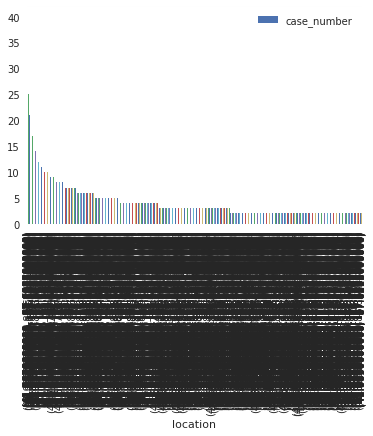

In [45]:
df5.plot(x='location', y='case_number', kind='bar')

Cant' see much from the chart. 
<br/>Anyway, this is the area with most crimes: https://goo.gl/maps/sG6bqFV9Xcm 
<br/>in my dataframe (<b>not</b> in Chicago - since I only took 10,000 rows from the > 1 M rows)
<br/>(after removing 6xzeros from both latitude and longitude)

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html 

In [41]:
############################## THIS
#df3 has the rows that have location set
print(df3.shape[0])
df31=df3.drop_duplicates(subset="primary_type")
print(df31.shape[0])

9880
25


In [10]:
print(df31["primary_type"])

0                               HOMICIDE
3                    CRIM SEXUAL ASSAULT
7                                ROBBERY
43                               BATTERY
174               PUBLIC PEACE VIOLATION
289                              ASSAULT
375                             STALKING
376                             BURGLARY
441                                THEFT
576                  MOTOR VEHICLE THEFT
625                                ARSON
626                   DECEPTIVE PRACTICE
655                      CRIMINAL DAMAGE
755                    CRIMINAL TRESPASS
770                    WEAPONS VIOLATION
786                         PROSTITUTION
803                          SEX OFFENSE
805                             GAMBLING
806           OFFENSE INVOLVING CHILDREN
816                           KIDNAPPING
817                            NARCOTICS
935                 LIQUOR LAW VIOLATION
936                        OTHER OFFENSE
975     INTERFERENCE WITH PUBLIC OFFICER
1614            

In [42]:
############################## THIS
LIST_PRIMARY_TYPE = df31["primary_type"].tolist()
print(LIST_PRIMARY_TYPE)

['HOMICIDE', 'CRIM SEXUAL ASSAULT', 'ROBBERY', 'BATTERY', 'PUBLIC PEACE VIOLATION', 'ASSAULT', 'STALKING', 'BURGLARY', 'THEFT', 'MOTOR VEHICLE THEFT', 'ARSON', 'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS', 'WEAPONS VIOLATION', 'PROSTITUTION', 'SEX OFFENSE', 'GAMBLING', 'OFFENSE INVOLVING CHILDREN', 'KIDNAPPING', 'NARCOTICS', 'LIQUOR LAW VIOLATION', 'OTHER OFFENSE', 'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION']


In [49]:
print(df31.head(1))

   unique_key case_number                date             block  iucr  \
0        3045    HL177967 2005-02-12 20:47:00  007XX E 103RD ST  0110   

  primary_type          description location_description  arrest  domestic  \
0     HOMICIDE  FIRST DEGREE MURDER         RETAIL STORE    True     False   

                ...                 ward  community_area  fbi_code  \
0               ...                  9.0            50.0       01A   

   x_coordinate y_coordinate  year          updated_on   latitude  longitude  \
0     1182951.0    1836828.0  2005 2015-08-17 15:03:40  41.707456 -87.605637   

                          location  
0  (41.7070000000, -87.6056000000)  

[1 rows x 22 columns]


So things of interest: primary_type ; location_description ; arrest ; domestic ; year ; location

In [43]:
############################## THIS
df32=df3.drop_duplicates(subset="location_description")
print(df32.shape[0])
print(df32["location_description"])

81
0                            RETAIL STORE
1                                  STREET
3                               RESIDENCE
5                  VEHICLE NON-COMMERCIAL
7                             HOTEL/MOTEL
8                                SIDEWALK
10                            GAS STATION
13         PARKING LOT/GARAGE(NON.RESID.)
15                       RESIDENCE-GARAGE
19                                TAXICAB
32                     SMALL RETAIL STORE
37               SCHOOL, PUBLIC, BUILDING
44                SCHOOL, PUBLIC, GROUNDS
45                RESIDENCE PORCH/HALLWAY
53                              APARTMENT
70                                  OTHER
84                     VEHICLE-COMMERCIAL
88                                CTA BUS
120                                 ALLEY
136                            RESTAURANT
216         RESIDENTIAL YARD (FRONT/BACK)
297       POLICE FACILITY/VEH PARKING LOT
323                    GROCERY FOOD STORE
327                   TAVERN/LI

In [44]:
############################## THIS
LIST_LOCATION_DESCRIPTION = df32["location_description"].tolist()
print(LIST_LOCATION_DESCRIPTION)

['RETAIL STORE', 'STREET', 'RESIDENCE', 'VEHICLE NON-COMMERCIAL', 'HOTEL/MOTEL', 'SIDEWALK', 'GAS STATION', 'PARKING LOT/GARAGE(NON.RESID.)', 'RESIDENCE-GARAGE', 'TAXICAB', 'SMALL RETAIL STORE', 'SCHOOL, PUBLIC, BUILDING', 'SCHOOL, PUBLIC, GROUNDS', 'RESIDENCE PORCH/HALLWAY', 'APARTMENT', 'OTHER', 'VEHICLE-COMMERCIAL', 'CTA BUS', 'ALLEY', 'RESTAURANT', 'RESIDENTIAL YARD (FRONT/BACK)', 'POLICE FACILITY/VEH PARKING LOT', 'GROCERY FOOD STORE', 'TAVERN/LIQUOR STORE', 'CHA PARKING LOT/GROUNDS', 'CONSTRUCTION SITE', 'VACANT LOT/LAND', 'CHA APARTMENT', 'DRUG STORE', 'ABANDONED BUILDING', 'DEPARTMENT STORE', 'CHURCH/SYNAGOGUE/PLACE OF WORSHIP', 'BARBERSHOP', 'POOL ROOM', 'DRIVEWAY - RESIDENTIAL', 'BANK', 'ATM (AUTOMATIC TELLER MACHINE)', 'CONVENIENCE STORE', 'SPORTS ARENA/STADIUM', 'COMMERCIAL / BUSINESS OFFICE', 'PARK PROPERTY', 'CTA TRAIN', 'BAR OR TAVERN', 'CURRENCY EXCHANGE', 'GOVERNMENT BUILDING/PROPERTY', 'CTA PLATFORM', 'LIBRARY', 'CTA BUS STOP', 'PAWN SHOP', 'WAREHOUSE', 'HIGHWAY/EXPRE

We could first test a simple ML model: given primary_type, location_description => predict arrest (Y/N).
<br/><b>BUT it's NOT ENOUGH</b> - these will be memorized! Need to add another feature.
<br> even so, I can do it like this first, just to see the result.

First - need to create 3 datasets: train, eval, test

https://en.wikipedia.org/wiki/Random_seed
If the same random seed is deliberately shared, it becomes a secret key, so two or more systems using matching pseudorandom number algorithms and matching seeds can generate matching sequences of non-repeating numbers which can be used to synchronize remote systems
<br/>https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.RandomState.rand.html#numpy.random.RandomState.rand

In [6]:
print(df3.shape[0])

9880


In [45]:
############################## THIS
import numpy as np
np.random.seed(seed=1) #makes result reproducible

msk = np.random.rand(10) < 0.5
print(msk)
print(~msk)

[ True False  True  True  True  True  True  True  True False]
[False  True False False False False False False False  True]


In [46]:
############################## THIS
#keeping the last ones for 
testdf=df3[9000:]
print(testdf.shape[0])
df3new=df3[0:9000]
print(df3new.shape[0])

880
9000


In [47]:
############################## THIS
msk = np.random.rand(len(df3new)) < 0.8 
traindf = df3new[msk]
evaldf = df3new[~msk]

In [48]:
############################## THIS
import pandas as pd
import tensorflow as tf

In [15]:
traindf.head(1)

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,3045,HL177967,2005-02-12 20:47:00,007XX E 103RD ST,0110,HOMICIDE,FIRST DEGREE MURDER,RETAIL STORE,True,False,...,9.0,50.0,01A,1182951.0,1836828.0,2005,2015-08-17 15:03:40,41.707456,-87.605637,"(41.7070000001, -87.6056000000)"


https://www.tensorflow.org/api_docs/python/tf/estimator/inputs/pandas_input_fn

In [49]:
############################## THIS
# Define your feature columns
def create_feature_cols():
  return [
    tf.feature_column.categorical_column_with_vocabulary_list(key='primary_type', vocabulary_list=LIST_PRIMARY_TYPE, num_oov_buckets=0),
    tf.feature_column.categorical_column_with_vocabulary_list(key='location_description', vocabulary_list=LIST_LOCATION_DESCRIPTION, num_oov_buckets=0),
  ]

https://www.tensorflow.org/api_docs/python/tf/estimator/inputs/pandas_input_fn 

In [50]:
############################## THIS
#https://stackoverflow.com/questions/3765533/python-array-with-string-indices 
#def input_fn_train: # returns x, y (where y represents label's class index).
label_arrest_dict={True:0, False:1}
print(label_arrest_dict.keys())
print(label_arrest_dict[False])

[False, True]
1


In [22]:
import numpy as np
x = np.array([1, 2, 3, 4, 5])
f = lambda x: x ** 2
squares = f(x)
print(squares)

[ 1  4  9 16 25]


In [50]:
#NOT GOOD
tmptestdf=copy.deepcopy(testdf)
ox = tmptestdf["arrest"][0:5]
print(type(ox))
print(ox)
print(ox.data)
#ox=[True, False]
#print(ox)
func = lambda x: label_arrest_dict[x]
from numpy import vectorize
vfunc = vectorize(func)
#sy = f(ox)
sy = np.apply_along_axis(vfunc, 0, ox)
print(type(sy))
print(sy)
#NOT GOOD

<class 'pandas.core.series.Series'>
9109    False
9110     True
9111     True
9112     True
9113    False
Name: arrest, dtype: bool
  
<type 'numpy.ndarray'>
[1 0 0 0 1]
<class 'pandas.core.series.Series'>
9109    False
9110     True
9111     True
9112     True
9113    False
Name: arrest, dtype: bool
  
<type 'numpy.ndarray'>
[1 0 0 0 1]


In [57]:
#THIS is what I need
#https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.Series.apply.html#pandas.Series.apply
tmptestdf=copy.deepcopy(testdf)
ox = tmptestdf["arrest"][0:5]
print(type(ox))
print(ox)
func = lambda x: label_arrest_dict[x]
sy = ox.apply(func)
print(type(sy))
print(sy)

<class 'pandas.core.series.Series'>
9109    False
9110     True
9111     True
9112     True
9113    False
Name: arrest, dtype: bool
<class 'pandas.core.series.Series'>
9109    1
9110    0
9111    0
9112    0
9113    1
Name: arrest, dtype: int64


In [51]:
############################## THIS
# Create pandas input function
def make_input_fn(df, num_epochs, predictMode=False):
    print("in make_input_fn")
    print("got df of length " + str(df.shape[0]))
    df=df[['primary_type','location_description','arrest']]
    df=df.dropna(how='any')#this is critical as I was getting some strange Internal Errors https://stackoverflow.com/questions/45974009/tensorflow-python-framework-errors-impl-internalerror-unable-to-get-element-fro
    print("after removing null, df has length " + str(df.shape[0]))
    
    if (not predictMode):
        print("train/evaluate mode")
        func = lambda x: label_arrest_dict[x]
        y = df['arrest'].apply(func)
        shuffle = True
    else:
        print("predict mode")
        y = None
        shuffle = False

    return tf.estimator.inputs.pandas_input_fn(
        x = df[['primary_type','location_description']],
        y = y,
        batch_size = 128,
        num_epochs = num_epochs,
        shuffle = shuffle,
        queue_capacity = 1000,
        num_threads = 1
    )

https://stackoverflow.com/questions/45974009/tensorflow-python-framework-errors-impl-internalerror-unable-to-get-element-fro

https://www.tensorflow.org/api_docs/python/tf/feature_column

In [52]:
############################## THIS
# Create estimator train and evaluate function
def train_and_evaluate(output_dir, num_train_steps):
  estimator = tf.estimator.LinearClassifier(model_dir = output_dir, feature_columns = create_feature_cols())
  train_spec = tf.estimator.TrainSpec(input_fn = make_input_fn(traindf, None), 
                                      max_steps = num_train_steps)
  eval_spec = tf.estimator.EvalSpec(input_fn = make_input_fn(evaldf, 1), 
                                    steps = None, 
                                    start_delay_secs = 1, # start evaluating after N seconds, 
                                    throttle_secs = 5)  # evaluate every N seconds
  tf.estimator.train_and_evaluate(estimator, train_spec, eval_spec)

In [23]:
############################## THIS
# Launch tensorboard
from google.datalab.ml import TensorBoard

OUTDIR = './trained_model'
TensorBoard().start(OUTDIR)

TensorBoard was started successfully with pid 3460. Click here to access it.

3460

In [22]:
traindf.head(1)

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,3045,HL177967,2005-02-12 20:47:00,007XX E 103RD ST,0110,HOMICIDE,FIRST DEGREE MURDER,RETAIL STORE,True,False,...,9.0,50.0,01A,1182951.0,1836828.0,2005,2015-08-17 15:03:40,41.707456,-87.605637,"(41.7070000001, -87.6056000000)"


In [23]:
traindf[['primary_type','location_description']].head(2)

,primary_type,location_description
0,HOMICIDE,RETAIL STORE
1,HOMICIDE,STREET


In [38]:
for i in LIST_PRIMARY_TYPE:
  print(str(LIST_PRIMARY_TYPE.index(i)) + "  " + i)

0  HOMICIDE
1  CRIM SEXUAL ASSAULT
2  ROBBERY
3  BATTERY
4  PUBLIC PEACE VIOLATION
5  ASSAULT
6  STALKING
7  BURGLARY
8  THEFT
9  MOTOR VEHICLE THEFT
10  ARSON
11  DECEPTIVE PRACTICE
12  CRIMINAL DAMAGE
13  CRIMINAL TRESPASS
14  WEAPONS VIOLATION
15  PROSTITUTION
16  SEX OFFENSE
17  GAMBLING
18  OFFENSE INVOLVING CHILDREN
19  KIDNAPPING
20  NARCOTICS
21  LIQUOR LAW VIOLATION
22  OTHER OFFENSE
23  INTERFERENCE WITH PUBLIC OFFICER
24  INTIMIDATION


In [22]:
# Run the model
import shutil
shutil.rmtree(OUTDIR, ignore_errors = True)
train_and_evaluate(OUTDIR, 2000)

INFO:tensorflow:Saving checkpoints for 2 into ./trained_model/model.ckpt.
INFO:tensorflow:loss = 76.45322, step = 2
INFO:tensorflow:global_step/sec: 66.7835
INFO:tensorflow:loss = 47.88486, step = 102 (1.498 sec)
INFO:tensorflow:Saving checkpoints for 184 into ./trained_model/model.ckpt.
INFO:tensorflow:Loss for final step: 48.669632.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-12-25-11:52:50
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./trained_model/model.ckpt-184
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-12-25-11:52:53
INFO:tensorflow:Saving dict for global step 184: accuracy = 0.84891677, accuracy_baseline = 0.6995439, auc = 0.8444734, auc_precision_recall = 0.90213645, average_loss = 0.393542, global_step = 184, label/mean = 0.6995439, loss = 49.305187, precision = 0.8406516, prediction/mean

In [40]:
for i in LIST_LOCATION_DESCRIPTION:
  print(str(LIST_LOCATION_DESCRIPTION.index(i)) + "  " + i)
#LIST_LOCATION_DESCRIPTION[None]

0  RETAIL STORE
1  STREET
2  RESIDENCE
3  VEHICLE NON-COMMERCIAL
4  HOTEL/MOTEL
5  SIDEWALK
6  GAS STATION
7  PARKING LOT/GARAGE(NON.RESID.)
8  RESIDENCE-GARAGE
9  TAXICAB
10  SMALL RETAIL STORE
11  SCHOOL, PUBLIC, BUILDING
12  SCHOOL, PUBLIC, GROUNDS
13  RESIDENCE PORCH/HALLWAY
14  APARTMENT
15  OTHER
16  VEHICLE-COMMERCIAL
17  CTA BUS
18  ALLEY
19  RESTAURANT
20  RESIDENTIAL YARD (FRONT/BACK)
21  POLICE FACILITY/VEH PARKING LOT
22  GROCERY FOOD STORE
23  TAVERN/LIQUOR STORE
24  CHA PARKING LOT/GROUNDS
25  CONSTRUCTION SITE
26  VACANT LOT/LAND
27  CHA APARTMENT
28  DRUG STORE
29  ABANDONED BUILDING
30  DEPARTMENT STORE
31  CHURCH/SYNAGOGUE/PLACE OF WORSHIP
32  BARBERSHOP
33  POOL ROOM
34  DRIVEWAY - RESIDENTIAL
35  BANK
36  ATM (AUTOMATIC TELLER MACHINE)
37  CONVENIENCE STORE
38  SPORTS ARENA/STADIUM
39  COMMERCIAL / BUSINESS OFFICE
40  PARK PROPERTY
41  CTA TRAIN
42  BAR OR TAVERN
43  CURRENCY EXCHANGE
44  GOVERNMENT BUILDING/PROPERTY
45  CTA PLATFORM
46  LIBRARY
47  CTA BUS STOP
48 

TypeError: cannot concatenate 'str' and 'NoneType' objects

In [53]:
############################## THIS
print(LIST_LOCATION_DESCRIPTION[79])
LIST_LOCATION_DESCRIPTION[79]='None'
print(LIST_LOCATION_DESCRIPTION[79])

None
None


In [54]:
############################## THIS
# Run the model
import shutil
OUTDIR = './trained_model'
shutil.rmtree(OUTDIR, ignore_errors = True)
train_and_evaluate(OUTDIR, 2000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_train_distribute': None, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f203e47bfd0>, '_evaluation_master': '', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': './trained_model', '_global_id_in_cluster': 0, '_save_summary_steps': 100}
in make_input_fn
got df of length 7246
after removing null, df has length 7244
train/evaluate mode
in make_input_fn
got df of length 1754
after removing null, df has length 1754
train/evaluate mode
INFO:tensorflow:Running training and evaluation locally (non-distributed).
INFO:tensorflow:Start train and evaluate loop. The evaluate will hap

lets try to predict now

In [55]:
############################## THIS
print(label_arrest_dict)
reverse_label_dict={}
for key, value in label_arrest_dict.iteritems():
  print(str(key)+","+str(value))
  reverse_label_dict[value]=key
print(reverse_label_dict)

{False: 1, True: 0}
False,1
True,0
{0: True, 1: False}


In [67]:
############################## THIS
OUTDIR = './trained_model'
estimator = tf.estimator.LinearClassifier(model_dir = OUTDIR, feature_columns = create_feature_cols())
# set steps to None to run evaluation until all data consumed.
results = estimator.predict(
    input_fn = make_input_fn(testdf, 1, predictMode=True))
print("model directory = %s" % OUTDIR)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_train_distribute': None, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f20453aa1d0>, '_evaluation_master': '', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': './trained_model', '_global_id_in_cluster': 0, '_save_summary_steps': 100}
in make_input_fn
got df of length 880
after removing null, df has length 880
predict mode
model directory = ./trained_model


In [28]:
print(type(results))

<type 'generator'>


In [ ]:
print(testdf.loc[[0]])

In [ ]:
print(testdf.iloc[[0]])

In [ ]:
print(testdf.loc[0:0])

In [ ]:
print(testdf.loc[0])

In [39]:
print(testdf.iloc[0])

unique_key                                      8457875
case_number                                    HV134540
date                                2012-01-27 16:20:00
block                                 010XX W NORTH AVE
iucr                                               0860
primary_type                                      THEFT
description                                RETAIL THEFT
location_description                              OTHER
arrest                                            False
domestic                                          False
beat                                               1811
district                                             18
ward                                                 32
community_area                                        7
fbi_code                                             06
x_coordinate                                1.16934e+06
y_coordinate                                1.91083e+06
year                                            

unique_key                                      8457875
case_number                                    HV134540
date                                2012-01-27 16:20:00
block                                 010XX W NORTH AVE
iucr                                               0860
primary_type                                      THEFT
description                                RETAIL THEFT
location_description                              OTHER
arrest                                            False
domestic                                          False
beat                                               1811
district                                             18
ward                                                 32
community_area                                        7
fbi_code                                             06
x_coordinate                                1.16934e+06
y_coordinate                                1.91083e+06
year                                            

<b>NO IDEA WHY it has 8 times the same element</b>

In [40]:
print(testdf.iloc[0]["arrest"])

False
False
False
False
False
False
False
False


In [64]:
print(type(testdf.iloc[0]))

<class 'pandas.core.series.Series'>


In [66]:
print(testdf.iloc[0].iloc[0])

8457875


In [75]:
jsn_str=testdf.iloc[0].to_json()
print((testdf.iloc[0])["arrest"])

print(jsn_str)
print(type(jsn_str))
import json
jsn = json.loads(jsn_str)
print(jsn["arrest"])

False
{"unique_key":8457875,"case_number":"HV134540","date":1327681200000,"block":"010XX W NORTH AVE","iucr":"0860","primary_type":"THEFT","description":"RETAIL THEFT","location_description":"OTHER","arrest":false,"domestic":false,"beat":1811,"district":18,"ward":32.0,"community_area":7.0,"fbi_code":"06","x_coordinate":1169336.0,"y_coordinate":1910832.0,"year":2012,"updated_on":1518277801000,"latitude":41.910835515,"longitude":-87.653351515,"location":"(41.9100000005, -87.6533000000)"}
<type 'str'>
False


In [76]:
print(testdf.iloc[0])

unique_key                                      8457875
case_number                                    HV134540
date                                2012-01-27 16:20:00
block                                 010XX W NORTH AVE
iucr                                               0860
primary_type                                      THEFT
description                                RETAIL THEFT
location_description                              OTHER
arrest                                            False
domestic                                          False
beat                                               1811
district                                             18
ward                                                 32
community_area                                        7
fbi_code                                             06
x_coordinate                                1.16934e+06
y_coordinate                                1.91083e+06
year                                            

In [38]:
testdf_tmp=copy.deepcopy(testdf)
testdf_tmp.head(1)
testdf_tmp.reset_index()
testdf_tmp.head(1)

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
9109,8457875,HV134540,2012-01-27 16:20:00,010XX W NORTH AVE,0860,THEFT,RETAIL THEFT,OTHER,False,False,...,32.0,7.0,06,1169336.0,1910832.0,2012,2018-02-10 15:50:01,41.910836,-87.653352,"(41.9100000005, -87.6533000000)"


,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
9109,8457875,HV134540,2012-01-27 16:20:00,010XX W NORTH AVE,0860,THEFT,RETAIL THEFT,OTHER,False,False,...,32.0,7.0,06,1169336.0,1910832.0,2012,2018-02-10 15:50:01,41.910836,-87.653352,"(41.9100000005, -87.6533000000)"


,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
9109,8457875,HV134540,2012-01-27 16:20:00,010XX W NORTH AVE,0860,THEFT,RETAIL THEFT,OTHER,False,False,...,32.0,7.0,06,1169336.0,1910832.0,2012,2018-02-10 15:50:01,41.910836,-87.653352,"(41.9100000005, -87.6533000000)"


,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
9109,8457875,HV134540,2012-01-27 16:20:00,010XX W NORTH AVE,0860,THEFT,RETAIL THEFT,OTHER,False,False,...,32.0,7.0,06,1169336.0,1910832.0,2012,2018-02-10 15:50:01,41.910836,-87.653352,"(41.9100000005, -87.6533000000)"


,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
9109,8457875,HV134540,2012-01-27 16:20:00,010XX W NORTH AVE,0860,THEFT,RETAIL THEFT,OTHER,False,False,...,32.0,7.0,06,1169336.0,1910832.0,2012,2018-02-10 15:50:01,41.910836,-87.653352,"(41.9100000005, -87.6533000000)"


,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
9109,8457875,HV134540,2012-01-27 16:20:00,010XX W NORTH AVE,0860,THEFT,RETAIL THEFT,OTHER,False,False,...,32.0,7.0,06,1169336.0,1910832.0,2012,2018-02-10 15:50:01,41.910836,-87.653352,"(41.9100000005, -87.6533000000)"


https://wiki.python.org/moin/Generators

In [66]:
numberofprintedtimes=0
def printmax5times(stringg):
  global numberofprintedtimes
  if (numberofprintedtimes<40):
    print(stringg)
    numberofprintedtimes = numberofprintedtimes + 1

Generators are iterators, a kind of iterable <b>you can only iterate over once</b>. Generators do not store all the values in memory, they generate the values on the fly.<br>
https://stackoverflow.com/questions/231767/what-does-the-yield-keyword-do

https://stackoverflow.com/questions/1663807/how-to-iterate-through-two-lists-in-parallel <br>
https://docs.python.org/2/library/functions.html#zip

In [68]:
############################## THIS
#this can only be ran ONCE bcs results is a generator
correct_results=0
for idx,result in enumerate(results):
  printmax5times("\n")
  printmax5times("###################")
  printmax5times('result: '+str(result))
  printmax5times(result['classes'][0])
  
  prediction_label = str(reverse_label_dict[int(result['classes'][0])])
  actual_label = str((testdf.iloc[idx])["arrest"])
  
  printmax5times("prediction was: arrest? "+ prediction_label)
  printmax5times("index is " + str(idx))
  printmax5times("and in reality arrest was " + actual_label)
  printmax5times("data was " + str(testdf.iloc[idx]))
  
  if (prediction_label == actual_label):
    correct_results = correct_results + 1

print("\n")
print("###################")
print("###################")
print("Number of correct results: " + str(correct_results) + " out of a total of " + str(testdf.shape[0]))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./trained_model/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


###################
result: {'probabilities': array([0.08003888, 0.9199611 ], dtype=float32), 'logits': array([2.441819], dtype=float32), 'classes': array(['1'], dtype=object), 'class_ids': array([1]), 'logistic': array([0.9199611], dtype=float32)}
1
prediction was: arrest? False
index is 0
and in reality arrest was False
data was unique_key                                      8457875
case_number                                    HV134540
date                                2012-01-27 16:20:00
block                                 010XX W NORTH AVE
iucr                                               0860
primary_type                                      THEFT
description                                RETAIL THEFT
locati



###################
###################
Number of correct results: 766 out of a total of 880


Number of correct results: 766 out of a total of 880

In [70]:
print(str((766.0/880)*100) + "% accuracy")

87.0454545455% accuracy


################### <br>
################### <br>
################### <br>
################### <br>
################### <br>
################### <br>
################### <br>
################### <br>
################### <br>

**** From https://stackoverflow.com/questions/46948172/predict-in-tensorflow-estimator-using-input-fn

The prediction result for one sample is below:<br/>
    {<br/>
        'probabilities': array([0.78595656, 0.21404342], dtype = float32),<br/>
        'logits': array([-1.3007226], dtype = float32),<br/>
        'classes': array(['0'], dtype = object),<br/>
        'class_ids': array([0]),<br/>
        'logistic': array([0.21404341], dtype = float32)<br/>
    }<br/>
What each field means are<br/>
<br/>
'probabilities': array([0.78595656, 0.21404342], dtype = float32).<br/>
It predicts the output label is class-0 (in this case <=50K) with confidence 0.78595656<br/>
'logits': array([-1.3007226], dtype = float32) <br/>
The value of z in equation 1/(1+e^(-z)) is -1.3.<br/>
'classes': array(['0'], dtype = object) <br/>
The class label is 0<br/>

result: {'probabilities': array([0.31800354, 0.68199646], dtype=float32), 'logits': array([0.762962], dtype=float32), 'classes': array(['1'], dtype=object), 'class_ids': array([1]), 'logistic': array([0.68199646], dtype=float32)}
result: {'probabilities': array([0.83636373, 0.1636363 ], dtype=float32), 'logits': array([-1.6314174], dtype=float32), 'classes': array(['0'], dtype=object), 'class_ids': array([0]), 'logistic': array([0.16363628], dtype=float32)}


In [31]:
############################## THIS
df321=df3.drop_duplicates(subset="arrest")
print(df32.shape[0])
print(df32["arrest"])

81
0        True
1        True
3       False
5        True
7       False
8       False
10       True
13      False
15      False
19      False
32      False
37       True
44      False
45      False
53      False
70       True
84      False
88      False
120     False
136      True
216     False
297     False
323      True
327     False
352     False
388     False
392     False
418     False
455      True
460     False
        ...  
2517    False
2826    False
2915     True
2994     True
2996    False
3116     True
3148     True
3161    False
3194    False
3427     True
3665    False
3907     True
3955    False
3979    False
4178     True
4330    False
4759    False
4824     True
4899    False
5556    False
5880     True
6101    False
6161    False
6349     True
7253    False
7389    False
8223    False
8948    False
9027    False
9151    False
Name: arrest, Length: 81, dtype: bool


In [32]:
testdf.head(3)

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
9109,8457875,HV134540,2012-01-27 16:20:00,010XX W NORTH AVE,0860,THEFT,RETAIL THEFT,OTHER,False,False,...,32.0,7.0,06,1169336.0,1910832.0,2012,2018-02-10 15:50:01,41.910836,-87.653352,"(41.9100000005, -87.6533000000)"
9110,2659165,HJ270211,2003-03-30 21:15:00,020XX N CLYBOURN AVE,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,...,43.0,7.0,06,1167450.0,1913641.0,2003,2018-02-28 15:56:25,41.918584,-87.660199,"(41.9180000008, -87.6601000000)"
9111,6041120,HP142752,2008-01-25 15:00:00,017XX W FULLERTON AVE,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,...,32.0,7.0,06,1164140.0,1915989.0,2008,2018-02-28 15:56:25,41.925098,-87.672294,"(41.9250000006, -87.6722000000)"


result: {'probabilities': array([0.91876584, 0.0812341 ], dtype=float32), 'logits': array([-2.4256961], dtype=float32), 'classes': array(['0'], dtype=object), 'class_ids': array([0]), 'logistic': array([0.0812341], dtype=float32)}
result: {'probabilities': array([0.69484776, 0.30515227], dtype=float32), 'logits': array([-0.82288194], dtype=float32), 'classes': array(['0'], dtype=object), 'class_ids': array([0]), 'logistic': array([0.30515227], dtype=float32)}
result: {'probabilities': array([0.69484776, 0.30515227], dtype=float32), 'logits': array([-0.82288194], dtype=float32), 'classes': array(['0'], dtype=object), 'class_ids': array([0]), 'logistic': array([0.30515227], dtype=float32)}
